In [2]:
# libraries for Cleaning and Basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the Dataset
df=pd.read_csv(r"C:\Users\Administrator\Desktop\Internship\Customer-Churn-Analysis\Telco-Customer-Churn.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
mean_total = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total)
df.drop('customerID', axis=1, inplace=True)

In [6]:
df['TotalCharges'] = df['TotalCharges'].astype(int)
df['MonthlyCharges'] = df['MonthlyCharges'].astype(int)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151,Yes


In [8]:
df.to_csv('cleaned_churn_data.csv', index=False)

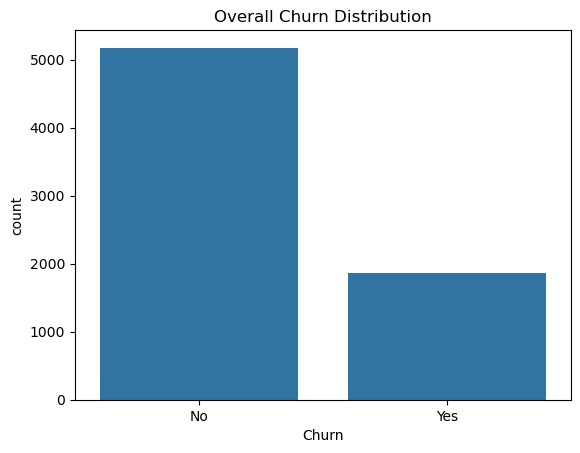

In [9]:
sns.countplot(x='Churn', data=df) #No of Users Left (Churned)
plt.title('Overall Churn Distribution')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

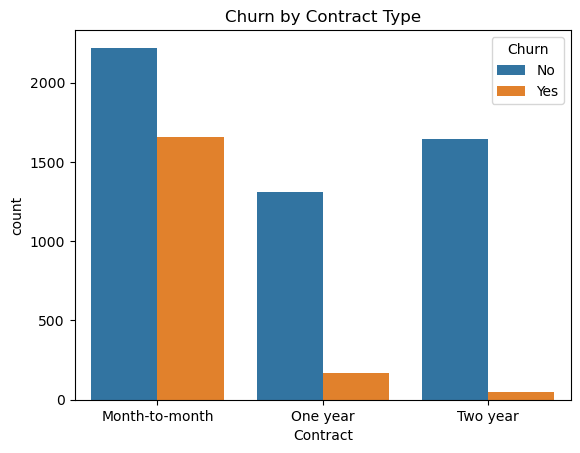

In [10]:
sns.countplot(x='Contract', hue='Churn', data=df) #churn correlated with contract type
plt.title('Churn by Contract Type')#"YES(1)" - Churned "NO(0)" - Stayed
plt.xticks([0, 1, 2], ['Month-to-month', 'One year', 'Two year'])
plt.show()

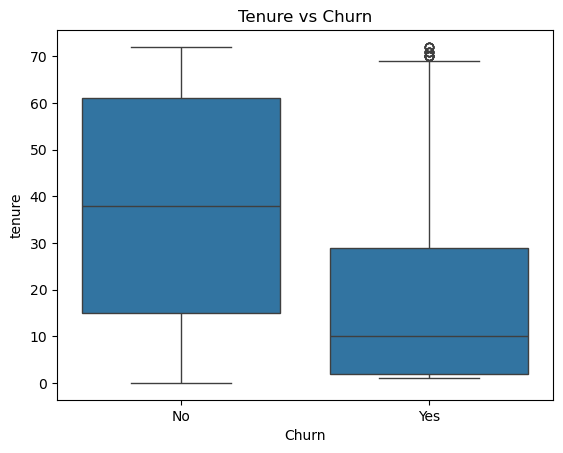

In [11]:
sns.boxplot(x='Churn', y='tenure', data=df)# Short Term Customers or new customers is Leaving More
plt.title('Tenure vs Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

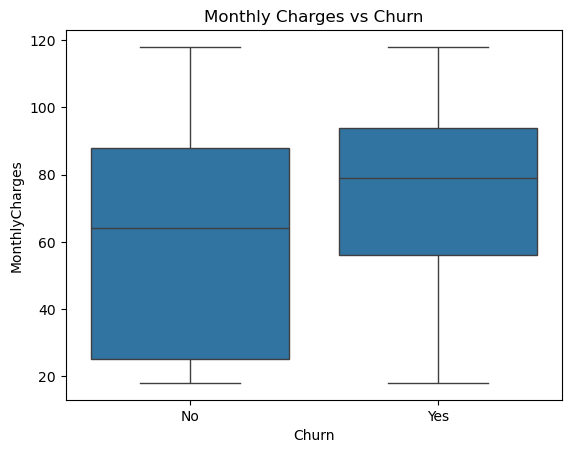

In [12]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)#Shows that does who pays more are being churned
plt.title('Monthly Charges vs Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [13]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0}) #map is like replace the matching values
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    
contract_map = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
df['Contract'] = df['Contract'].map(contract_map)

df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['InternetService', 'PaymentMethod'], drop_first=True)

columns_to_clean = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columns_to_clean:
    df[col] = df[col].replace('No internet service', 'No')

for col in columns_to_clean:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [14]:
df.to_csv('encoded_churn_data.csv', index=False)

In [15]:
from scipy.stats import chi2_contingency
contract_table = pd.crosstab(df['Contract'], df['Churn'])
chi2, p, dof, expected = chi2_contingency(contract_table)
print("Chi-Square value:", chi2)
print("P-value:", p)

Chi-Square value: 1184.5965720837926
P-value: 5.863038300673391e-258


In [16]:
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))

Churn             1.000000
MonthlyCharges    0.193422
TotalCharges     -0.199429
tenure           -0.352229
Name: Churn, dtype: float64


In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,0,1,29,29,0,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,1,0,56,1889,0,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,0,1,53,108,1,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,1,0,42,1840,0,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,0,1,70,151,1,True,False,False,True,False


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)                                                   

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [20]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),  
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    print(f"{name}: Accuracy = {acc:.4f}, ROC-AUC = {auc:.4f}")

Logistic Regression: Accuracy = 0.8062, ROC-AUC = 0.8423
Decision Tree: Accuracy = 0.7346, ROC-AUC = 0.6681
Random Forest: Accuracy = 0.7842, ROC-AUC = 0.8219


In [21]:
final_model = LogisticRegression(max_iter=10000)
final_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [22]:
X_train = pd.DataFrame(X_train, columns=X.columns).astype(float)
X_test = pd.DataFrame(X_test, columns=X.columns).astype(float)

PermutationExplainer explainer: 1410it [00:57, 23.27it/s]                                                              
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14380\2969539850.py:4: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


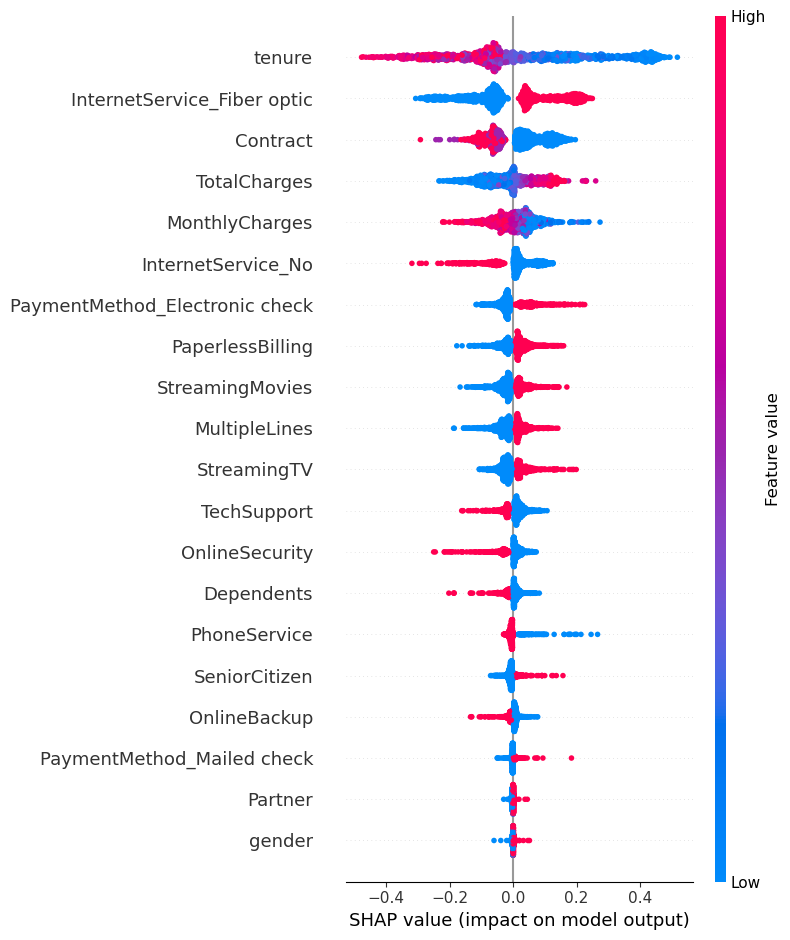

In [23]:
import shap
explainer = shap.Explainer(final_model.predict, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [24]:
import numpy as np
import pandas as pd
shap_df = pd.DataFrame(
    np.abs(shap_values.values), columns=X_test.columns
)
mean_shap = shap_df.mean().sort_values(ascending=False)
mean_shap.head(10)


tenure                            0.180227
InternetService_Fiber optic       0.109431
Contract                          0.072389
TotalCharges                      0.065701
MonthlyCharges                    0.048467
InternetService_No                0.047646
PaymentMethod_Electronic check    0.039012
PaperlessBilling                  0.032827
StreamingMovies                   0.031516
MultipleLines                     0.031117
dtype: float64

In [25]:
top_features = mean_shap.head(5).index.tolist()
print("Top features:", top_features)

Top features: ['tenure', 'InternetService_Fiber optic', 'Contract', 'TotalCharges', 'MonthlyCharges']


In [26]:
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

final_model_top = LogisticRegression(max_iter=10000)
final_model_top.fit(X_train_top, y_train)

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = final_model_top.predict(X_test_top)
y_prob = final_model_top.predict_proba(X_test_top)[:, 1]
print("Reduced Feature Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Reduced Feature Model:
Accuracy: 0.7792760823278921
ROC-AUC: 0.8298121883799634


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

le = LabelEncoder()
df_copy['Contract'] = le.fit_transform(df_copy['Contract'])

top_features = ['tenure', 'InternetService_Fiber optic', 'Contract', 'TotalCharges', 'MonthlyCharges']

X = df_copy[top_features]
y = df_copy['Churn']

final_model_top = LogisticRegression(max_iter=1000)
final_model_top.fit(X, y)

probs = final_model_top.predict_proba(X)[:, 1]
preds = final_model_top.predict(X)

result = X.copy()
result['Churn_Probability'] = probs
result['Predicted_Churn'] = preds

if 'customerID' in df.columns:
    result['CustomerID'] = df['customerID']

def segment(prob):
    if prob >= 0.7:
        return 'At Risk'
    elif prob >= 0.3:
        return 'Dormant'
    else:
        return 'Loyal'

result['Segment'] = result['Churn_Probability'].apply(segment)

ordered_cols = ['CustomerID'] if 'CustomerID' in result.columns else []
ordered_cols += top_features + ['Churn_Probability', 'Predicted_Churn', 'Segment']
result = result[ordered_cols]

result.to_csv("churn_predictions_all_customers.csv", index=False)


   tenure  InternetService_Fiber optic  Contract  TotalCharges  \
0       1                        False         0            29   
1      34                        False         1          1889   
2       2                        False         0           108   
3      45                        False         1          1840   
4       2                         True         0           151   

   MonthlyCharges  Churn_Probability  Predicted_Churn  Segment  
0              29           0.338494                0  Dormant  
1              56           0.072310                0    Loyal  
2              53           0.404476                0  Dormant  
3              42           0.036015                0    Loyal  
4              70           0.646834                1  Dormant  
